In [23]:
import pandas as pd

col_names = ['image_no', 'image_name', 'score']
results = pd.read_csv('results/pae-latent_dim=4-use_flow=false/selections-pae.csv', header=None, 
             index_col=0, names=col_names)
labels = pd.read_csv('labels.csv', index_col=0, names=['is_outlier'])
results = results.sort_values(by='image_no').reset_index()
results['is_outlier'] = labels

In [10]:
# results.sort_values(by='image_no').reset_index()['is_outlier'].astype(int).to_csv('labels.csv', header=None)

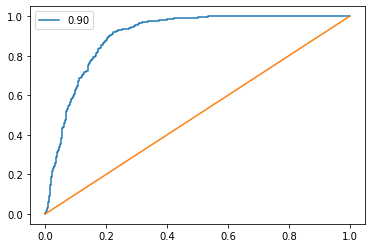

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(results['is_outlier'], results['score'])
score = roc_auc_score(results['is_outlier'], results['score'])

plt.figure()
plt.plot(fpr, tpr, label='%0.2f' % score)
plt.plot([0,1], [0,1])
plt.legend()

In [11]:
col_names = ['sample_no', 'sample_name', 'score']
path = '../faw_time_series/results/negative_sampling-percent_increase=20/selections-negative_sampling.csv'
pae = '../faw_time_series/results/pae-latent_dim=3/selections-pae.csv'
results = pd.read_csv(pae, index_col=0, names=col_names)
labels = pd.read_csv('../../sample_data/earth_fieldsamples/kenya_labels.csv', 
                     index_col=0, names=['is_outlier'])

results = results.sort_values(by='sample_no')
results['is_outlier'] = labels

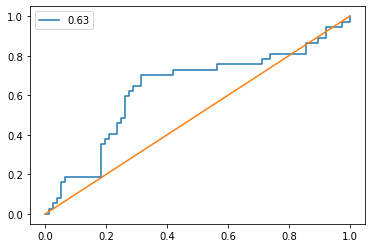

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(results['is_outlier'], results['score'])
score = roc_auc_score(results['is_outlier'], results['score'])

plt.figure()
plt.plot(fpr, tpr, label='%0.2f' % score)
plt.plot([0,1], [0,1])
plt.legend()

In [16]:
col_names = ['sample_no', 'sample_name', 'score']
path = '../planetary_rover/results/pae-latent_dim=5-use_flow=True/selections-pae.csv'
results = pd.read_csv(path, index_col=0, names=col_names)
labels = pd.read_csv('../planetary_rover/novel_labels.csv', index_col=0, 
                     names=['is_outlier'])

results = results.sort_values(by='sample_no')
results['is_outlier'] = labels

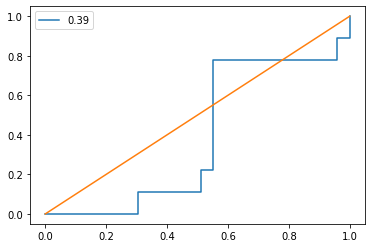

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(results['is_outlier'], results['score'])
score = roc_auc_score(results['is_outlier'], results['score'])

plt.figure()
plt.plot(fpr, tpr, label='%0.2f' % score)
plt.plot([0,1], [0,1])
plt.legend()